In [2]:
# Utilities
import helper as cus_utils

# torch
import torch
from torch import nn

# numpy
import numpy as np

# visualization
import matplotlib.pyplot as plt

%matplotlib widget

# Concise Implementaion of Linear Regression

## Defining the model

In [3]:
class LinearRegression(cus_utils.Module):
    def __init__(self, lr) -> None:
        super().__init__()
        self.lr = lr
        self.net = nn.LazyLinear(out_features=1)
        self.net.weight.data.normal_(mean=0, std=0.01)
        self.net.bias.data.fill_(value=0)

    def forward(self, x: torch.Tensor):
        return self.net(x)

    def loss(self, y_hat, y):
        fn = nn.MSELoss()
        return fn(y_hat, y)

    def configure_optimizer(self):
        return torch.optim.SGD(params=self.net.parameters(), lr=self.lr)


##  Create Data

In [4]:
class SyntheticRegressionData(cus_utils.DataModule):
    def __init__(
        self, w, b, noise=0.01, num_train=1000, num_val=1000, batch_size=32
    ) -> None:
        self.w = w
        self.b = b
        self.noise = noise
        self.num_train = num_train
        self.num_val = num_val
        self.batch_size = batch_size

        n = num_train + num_val
        self.X = torch.randn(size=(n, len(self.w)))
        noise = torch.randn(size=(n, 1)) * self.noise
        self.y = torch.matmul(self.X, torch.reshape(self.w, (-1, 1))) + b

    def get_dataloader(self, train: bool):
        i = slice(0, self.num_train) if train else slice(self.num_train, None)
        return self.get_tensorloader((self.X,self.y),train,i)

    def get_tensorloader(self, tensors, train, indices=slice(0, None)):
        tensors = tuple(a[indices] for a in tensors)
        dataset = torch.utils.data.TensorDataset(*tensors)
        return torch.utils.data.DataLoader(dataset=dataset,batch_size=self.batch_size,shuffle=True)


## Training the model

c:\Users\Lenovo\anaconda3\lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


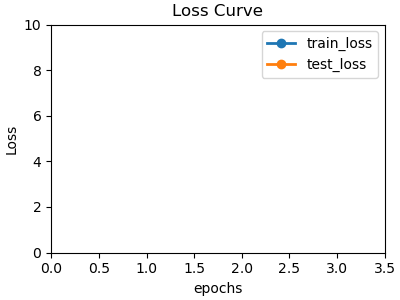

In [5]:
model = LinearRegression(lr=0.03)
data = SyntheticRegressionData(w = torch.tensor([2,-3.4]),b=4.2)
trainer = cus_utils.Trainer(max_epochs=10,show_ani=True)
trainer.fit(model,data)